# Gradient Boosting Decision Trees

Neste notebook iremos implementar o algoritmo GDBT para a classificação de nódulos.


In [ ]:
# Step 1: Import necessary libraries for GBDT using scikit-learn's GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('final_features.csv')

# Define X (features) and y (target)
y = data["malignancy"]
X = data.drop(columns=['malignancy', 'case_id'])

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the GradientBoostingClassifier
gbdt_model = GradientBoostingClassifier()

## Seleção dos hiperparametros e treino do modelo

In [20]:
# Step 4: Define hyperparameters to tune
param_grid_gbdt = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Step 5: Perform grid search with cross-validation, setting verbose to 2 for more progress info and parallelization
grid_search_gbdt = GridSearchCV(estimator=gbdt_model, param_grid=param_grid_gbdt, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Step 6: Fit the model
grid_search_gbdt.fit(X_train, y_train)

# Step 7: Print the best parameters and best score
print(f"Best Hyperparameters: {grid_search_gbdt.best_params_}")
print(f"Best CV Score: {grid_search_gbdt.best_score_}")

# Step 8: Train the final Gradient Boosting model with the best parameters
best_gbdt_model = grid_search_gbdt.best_estimator_

# Step 9: Predicting the labels for the test set
y_pred = best_gbdt_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best CV Score: 0.8817539901866788


## Avaliação do modelo

Accuracy on Test Set: 0.8855799373040752
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       765
           1       0.85      0.86      0.86       511

    accuracy                           0.89      1276
   macro avg       0.88      0.88      0.88      1276
weighted avg       0.89      0.89      0.89      1276



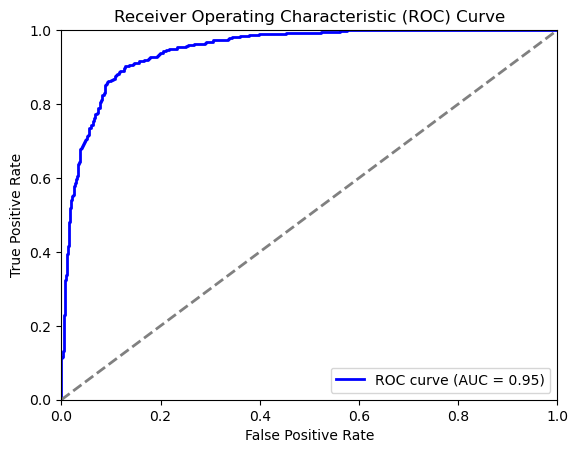

In [21]:
from sklearn.metrics import roc_curve, auc

# Step 10: Evaluating the model on the test set
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Step 11: Get the predicted probabilities for the positive class (assuming binary classification)
y_pred_proba = best_gbdt_model.predict_proba(X_test)[:, 1]

# Step 12: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Step 13: Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 14: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
